In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget http://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip

--2023-11-30 17:49:27--  http://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘heart+failure+clinical+records.zip.1’

heart+failure+clini     [ <=>                ]  12.13K  --.-KB/s    in 0.001s  

2023-11-30 17:49:27 (16.8 MB/s) - ‘heart+failure+clinical+records.zip.1’ saved [12421]



In [ ]:
!unzip -o /content/heart+failure+clinical+records.zip

Archive:  /content/heart+failure+clinical+records.zip
 extracting: heart_failure_clinical_records_dataset.csv  


In [ ]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

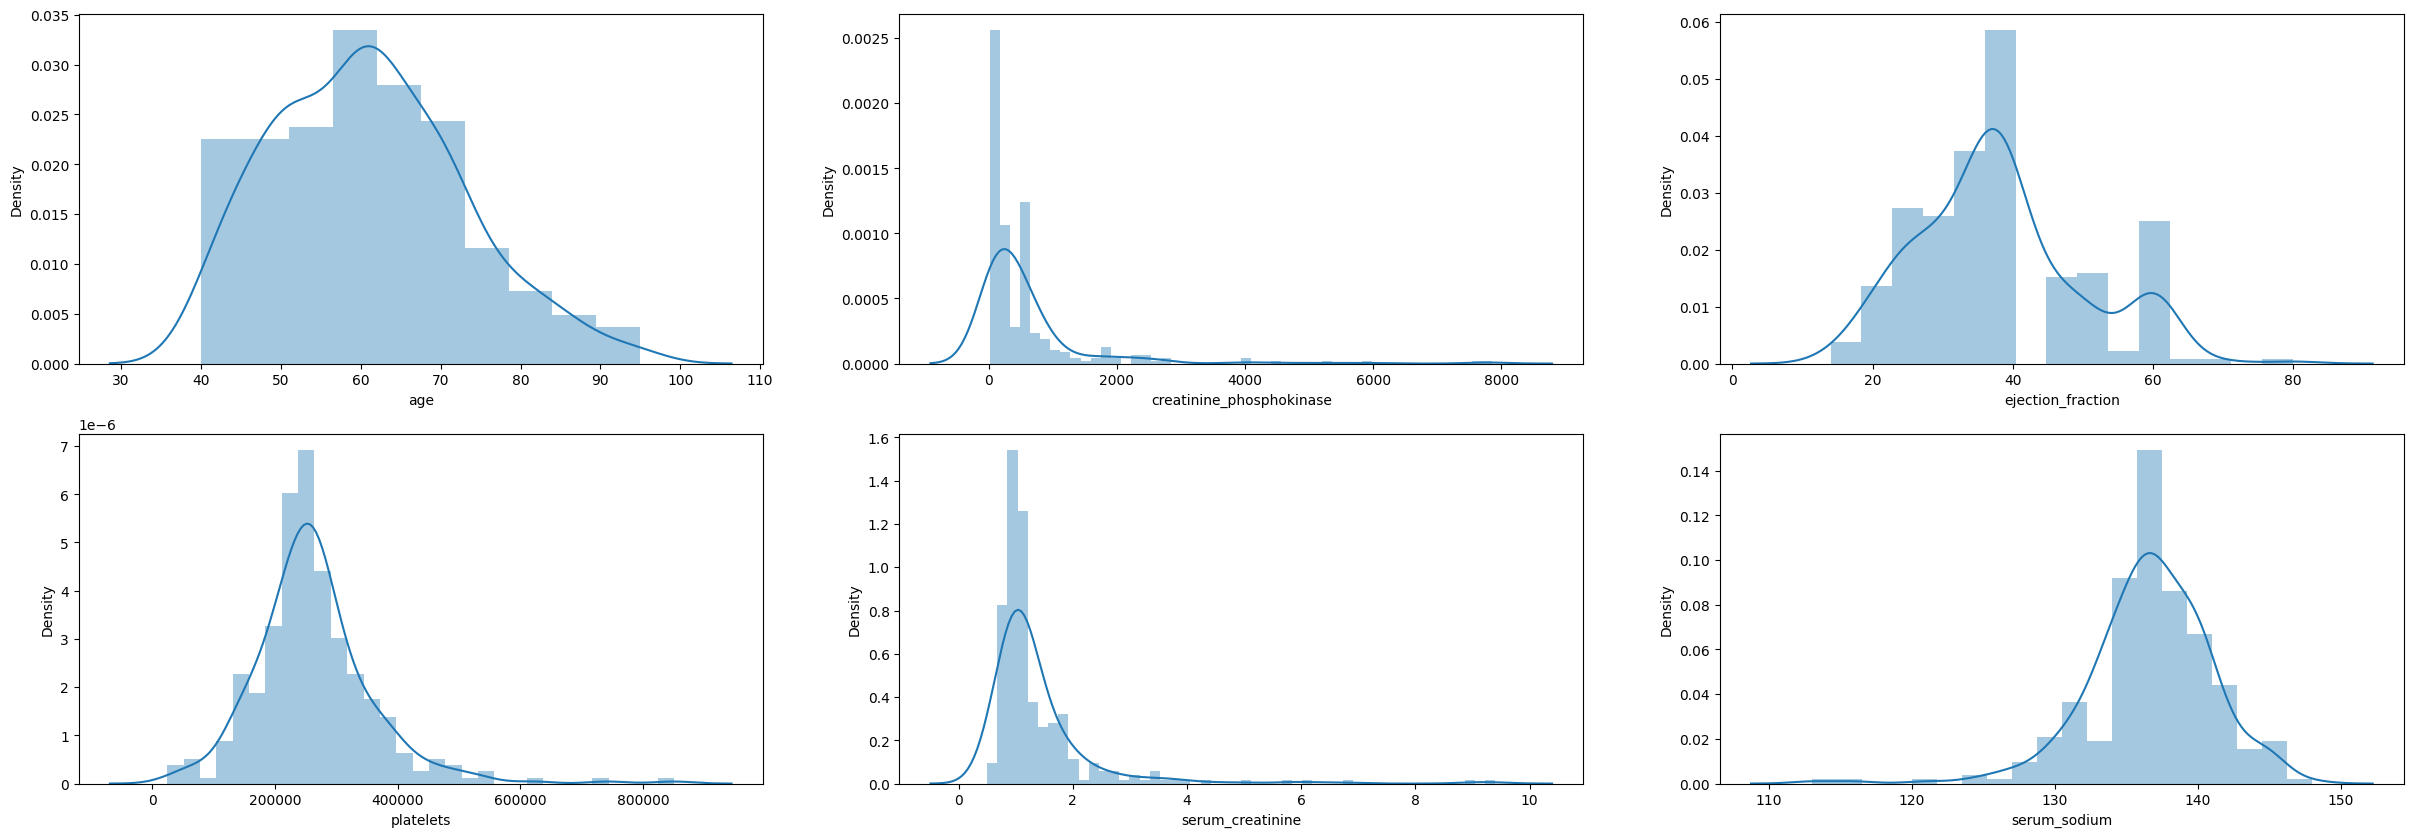

In [ ]:
continous_features=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]
plt.subplots(figsize=(30,10))
for i, col in enumerate(continous_features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

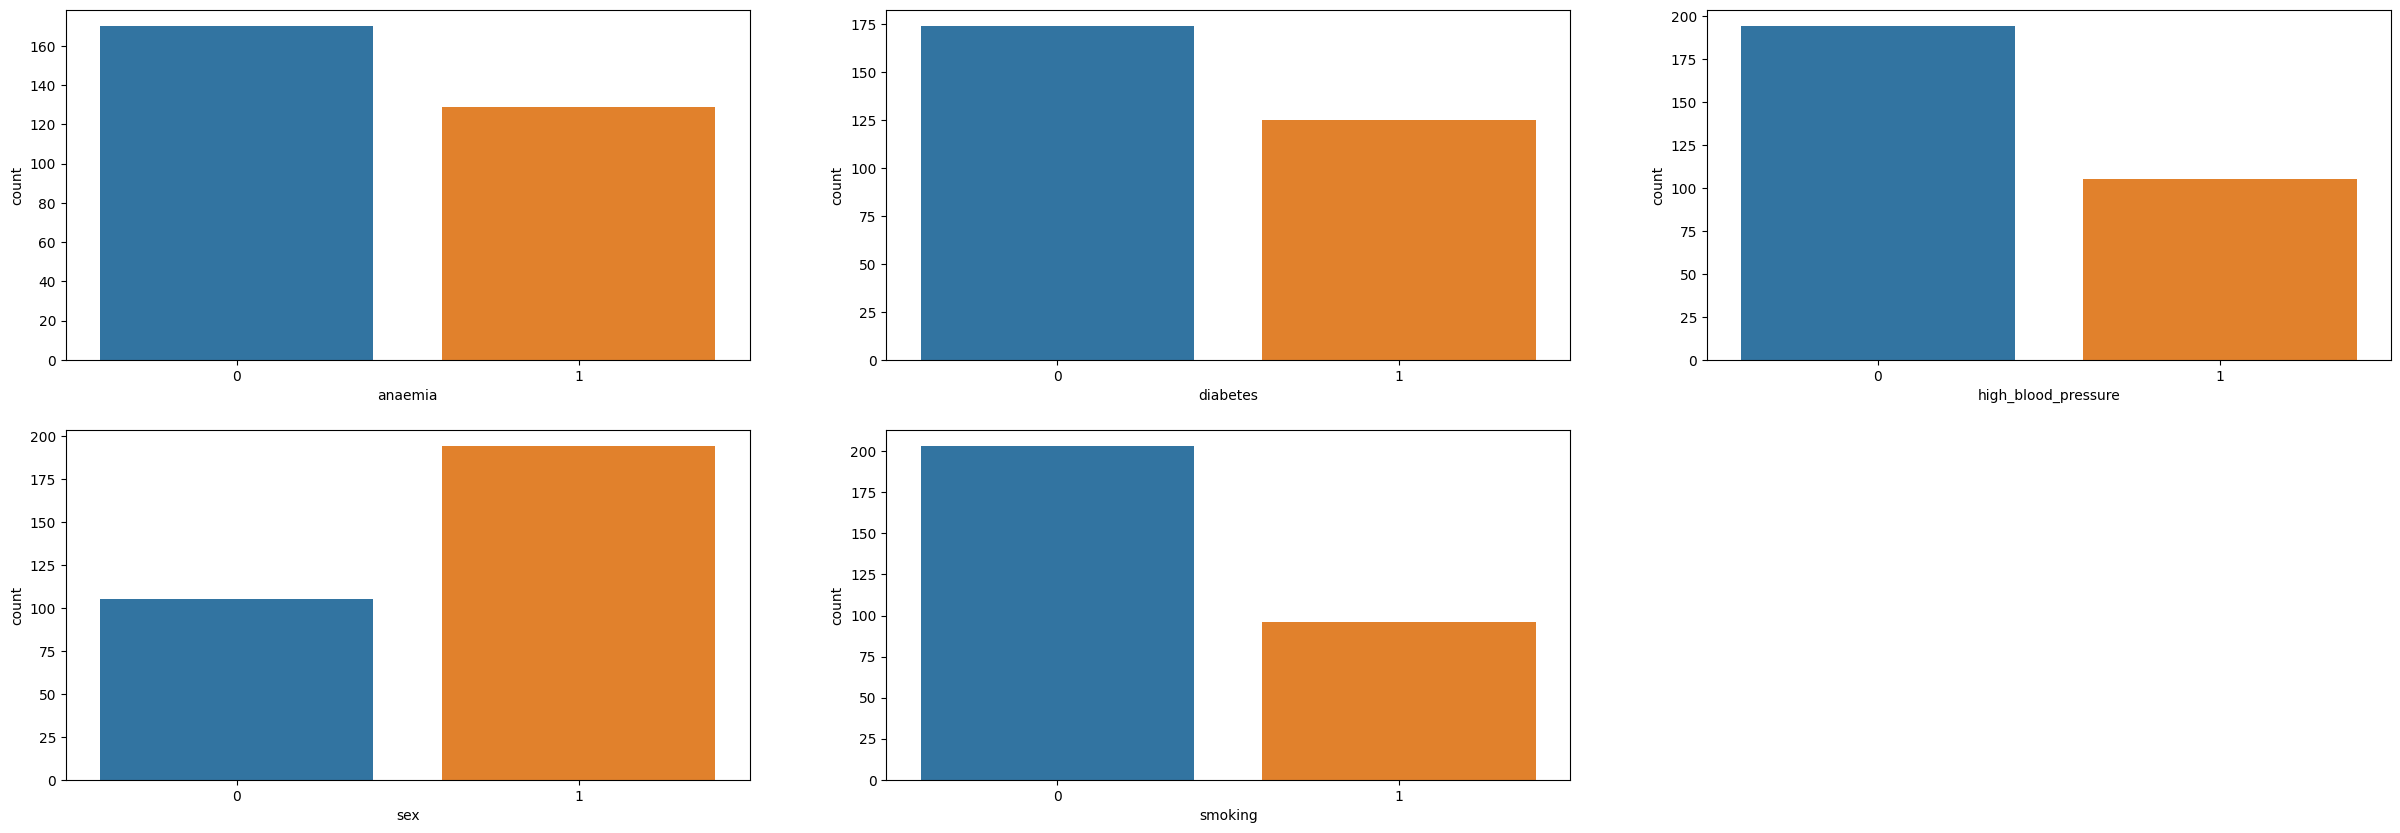

In [ ]:
#Checking categorical variables
categorical_features=["anaemia","diabetes","high_blood_pressure","sex","smoking"]
plt.subplots(figsize=(30,10))
for i, col in enumerate(categorical_features):
  plt.subplot(2,3,i+1)
  sns.countplot(x=df[col],data=df)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [ ]:
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
#logistic regression
lr_model=LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=GridSearchCV(lr_model,grid,cv=10,scoring='roc_auc')
logreg_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("best accuracy score:",logreg_cv.best_score_)
y_pred=logreg_cv.best_estimator_.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("roc_auc_score:",roc_auc_score(y_test,y_pred))

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
best accuracy score: 0.8938025210084033
accuracy_score: 0.8
roc_auc_score: 0.7657142857142858


In [ ]:
#decision tree
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
tree_cv = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True,scoring='roc_auc')
tree_cv.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("best accuracy :",tree_cv.best_score_)
y_pred=tree_cv.best_estimator_.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("roc_auc_score:",roc_auc_score(y_test,y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}
best accuracy : 0.854252610134963
accuracy_score: 0.6833333333333333
roc_auc_score: 0.6542857142857142


In [ ]:
#Random forest
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]

param_grid={ 'n_estimators':n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'max_samples': max_samples

}
rf = RandomForestClassifier()
rf_cv=GridSearchCV( estimator=rf,
                     param_grid=param_grid,
                     cv=5,
                     verbose=2,
                    scoring='roc_auc',
                     n_jobs=-1
)
rf_cv.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("best accuracy :",rf_cv.best_score_)
y_pred=rf_cv.best_estimator_.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("roc_auc_score:",roc_auc_score(y_test,y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
tuned hpyerparameters :(best parameters)  {'max_depth': None, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 60}
best accuracy : 0.9444041252864782
accuracy_score: 0.7333333333333333
roc_auc_score: 0.6857142857142856


In [ ]:
#XG boost
xg = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
xg_cv = GridSearchCV(
    estimator=xg,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
xg_cv.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",xg_cv.best_params_)
print("best accuracy :",xg_cv.best_score_)
y_pred=xg_cv.best_estimator_.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("roc_auc_score:",roc_auc_score(y_test,y_pred))

Fitting 10 folds for each of 96 candidates, totalling 960 fits
tuned hpyerparameters :(best parameters)  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 140}
best accuracy : 0.9243828781512604
accuracy_score: 0.7333333333333333
roc_auc_score: 0.7085714285714286
